# Support Vector Machines (SVMs) with scikit-learn

### Author: Cindy Lu
**March 7, 2023**

A tutorial to explore SVM - a popular supervised machine learning algorithm. Learn more at scikit learn [user guide](https://scikit-learn.org/stable/modules/svm.html). In addition, [Datacamp](https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python) is a great resource that is less technical to understand, and was also used as a reference guide for this tutorial.

## What is SVM?

SVMs are a set of supervised learning methods that can be used for classification, regression, and outliers detection. The algorithm can handle multiple continuous and categorical variables, and is effective in high dimensional spaces. It is memory efficient in the sense that it only uses a subset of training points in the decision function (called support vectors). In this tutorial, we will focus on the SVM classification functionalities. 

### SVM Classification

The core characteristics of SVM classification is that it aims to generate an optimal hyperplane with the maximum margin between different classes of the dataset. For non-linear datasets, SVM uses kernel to transform an input data space to a higher dimensional space into a required form. In other words, the kernel converts nonseparable problems to separable problems by adding dimensions.  \
![demo](SVM_theory.png)
![kernel](SVM_kernel.png)

* **Linear Kernel**: K(x, xi) = sum(x * xi)
* **Polynomial Kernal**: K(x,xi) = 1 + sum(x * xi)^d
d is the degree of the polynomial, to be specified in the learning algorithm. d=1 is similar to linear transformation.
* **Radial Basis Function Kernel**: K(x,xi) = exp(-gamma * sum((x – xi^2))
Gamma is a parameter ranging from 0 to 1, to be specified in the learning algorithm. Gamma = 0.1 as default, higher value may cause over-fitting.

## SVM Demonstration using scikit-learn

**Import python packages**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics # metrics module for accuracy calculation


### Data preparation

SVM in scikit-learn supports `numpy.ndarry` and `scipy.sparse` datasets, and does not support pandas dataframe directly. However, the conversion from a clean dataframe to numpy array can be done quite easily using pandas' funcion called `.values` (e.g. data_array = df.values)

**Load the dataset**

In [2]:
# Load the iris dataset from sciki-learn dataset library
iris = datasets.load_iris()

# Understand the dataset
print("Data Type:", type(iris.data)) # note the datatype is numpy array
print("Predictors:", iris.feature_names)
print("Targets:", iris.target_names)
print("Target values:", np.unique(iris.target))
print("First 5 records:\n" ,iris.data[0:5])

Data Type: <class 'numpy.ndarray'>
Predictors: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets: ['setosa' 'versicolor' 'virginica']
Target values: [0 1 2]
First 5 records:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


**Plot the Iris Dataset**

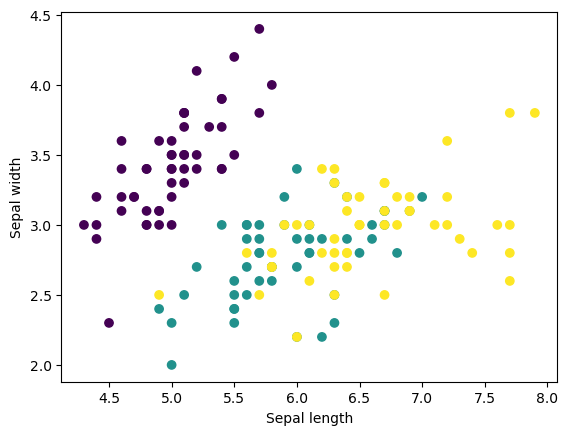

In [3]:
# Plot only the sepal length and width variables
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

**Partition the Dataset into Training and Testing Sets**

In [4]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=5)

### Model Training

In [5]:
# Use the linear kernel
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Evaluate the Model's Performance

In [6]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9555555555555556
Precision: 0.9611111111111111
Recall: 0.9555555555555556
F1-score: 0.9555555555555556


* Accuracy measures the proportion of correctly classified instances among all instances. It is defined as the number of true positives and true negatives divided by the total number of instances.

* Precision measures the proportion of true positives among all positive predictions. It is defined as the number of true positives divided by the sum of true positives and false positives.

* Recall measures the proportion of true positives among all actual positive instances. It is defined as the number of true positives divided by the sum of true positives and false negatives.

* F1-score is the harmonic mean of precision and recall, which provides a single score that balances both precision and recall. It is defined as 2 times the product of precision and recall divided by the sum of precision and recall.

**Examine Weights of the Predictors**

In [7]:
#print(model.coef_)

# The `coef_` attribute from the SVM module returns the weight vectors of the model as a 2D array of shape (class#, feature#) - 3 classes and 4 features in the iris model.
weights = model.coef_
print(weights.shape)

# Print the weights of predictors for each class
for i, weight in enumerate(weights):
    print(f"Predictor Weights for class {i}: {weight}")

print("Predictors:", iris.feature_names)
print("Classes:", iris.target_names)

(3, 4)
Predictor Weights for class 0: [-0.23890434  0.48198792 -0.8656519  -0.60246986]
Predictor Weights for class 1: [-0.02034588  0.18311289 -0.52899278 -0.30518814]
Predictor Weights for class 2: [ 0.82331814  0.68274763 -2.09242406 -1.97189572]
Predictors: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']


Petal length as the most important predictor for all iris species

### Plot different SVM classifiers

Comparison of different linear SVM classifiers on a 2D dataset (i.e. 2 predictors in the iris dataset)  
[Reference](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py)

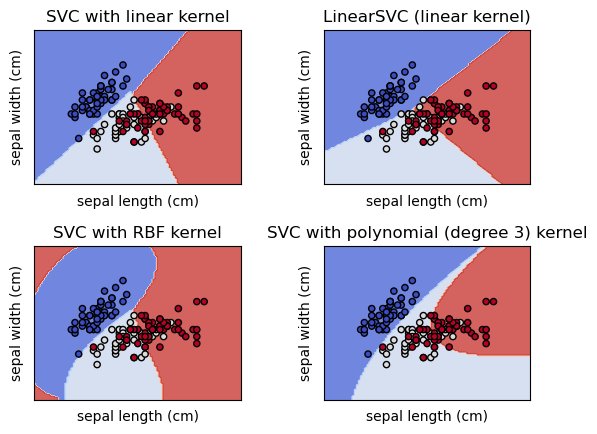

In [8]:
from sklearn.inspection import DecisionBoundaryDisplay

# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()